## Introduction

I started by creating a separate conda environments for installing Intel Optimized Scikit-Learn. The following command was used to create the environment:

```bash
conda create -n intel -c conda-forge python=3.9 scikit-learn-intelex
```

After creating the environment, I wrote a basic script to train all possible Classification and Regression models, that are optimized by intel, for any given dataset. The complete list of optimized models can be found [here](https://intel.github.io/scikit-learn-intelex/algorithms.html#on-cpu). I recorded some evaluation metrics, and also time taken by each model. 

**Note:** The study is only limited to CPU optimization, and not GPU optimization.

It was an insightful experiment, here are all my findings.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Total time taken

In [14]:
from pathlib import Path

path = Path('results')
files = list(path.glob('*.csv'))
files

[PosixPath('results/intel_boston.csv'),
 PosixPath('results/intel_breast_cancer.csv'),
 PosixPath('results/intel_cls_artificial.csv'),
 PosixPath('results/intel_diabetes.csv'),
 PosixPath('results/intel_reg_artificial.csv'),
 PosixPath('results/py39_boston.csv'),
 PosixPath('results/py39_breast_cancer.csv'),
 PosixPath('results/py39_cls_artificial.csv'),
 PosixPath('results/py39_diabetes.csv'),
 PosixPath('results/py39_reg_artificial.csv')]

In [36]:
data = []
for f in files:
    row = []
    if f.name.startswith('py39'):
        row.append('Standard')
    else:
        row.append('Intel Optimized')

    row.append(pd.read_csv(f, index_col=0)['Time Taken'].sum())
    row.append(f.name.split('_', maxsplit=1)[1][:-4])
    row.append(f.name)
    data.append(row)
data

[['Intel Optimized', 0.0596177577972407, 'boston', 'intel_boston.csv'],
 ['Intel Optimized',
  0.0527193546295165,
  'breast_cancer',
  'intel_breast_cancer.csv'],
 ['Intel Optimized',
  0.5591700077056883,
  'cls_artificial',
  'intel_cls_artificial.csv'],
 ['Intel Optimized', 0.0565016269683834, 'diabetes', 'intel_diabetes.csv'],
 ['Intel Optimized',
  2.9776558876037593,
  'reg_artificial',
  'intel_reg_artificial.csv'],
 ['Standard', 0.12478184700012171, 'boston', 'py39_boston.csv'],
 ['Standard', 0.1108360290527341, 'breast_cancer', 'py39_breast_cancer.csv'],
 ['Standard', 0.950474739074707, 'cls_artificial', 'py39_cls_artificial.csv'],
 ['Standard', 0.10692954063415491, 'diabetes', 'py39_diabetes.csv'],
 ['Standard', 13.789129734039307, 'reg_artificial', 'py39_reg_artificial.csv']]

In [37]:
data = pd.DataFrame(data, columns=['Environment', 'Time Taken', 'Dataset', 'file'])
data

,Environment,Time Taken,Dataset,file
0,Intel Optimized,0.059618,boston,intel_boston.csv
1,Intel Optimized,0.052719,breast_cancer,intel_breast_cancer.csv
2,Intel Optimized,0.559170,cls_artificial,intel_cls_artificial.csv
3,Intel Optimized,0.056502,diabetes,intel_diabetes.csv
4,Intel Optimized,2.977656,reg_artificial,intel_reg_artificial.csv
5,Standard,0.124782,boston,py39_boston.csv
6,Standard,0.110836,breast_cancer,py39_breast_cancer.csv
7,Standard,0.950475,cls_artificial,py39_cls_artificial.csv
8,Standard,0.106930,diabetes,py39_diabetes.csv
9,Standard,13.789130,reg_artificial,py39_reg_artificial.csv


In [38]:
data['Time Taken (log)'] = data['Time Taken'].apply(lambda x: np.log(x))

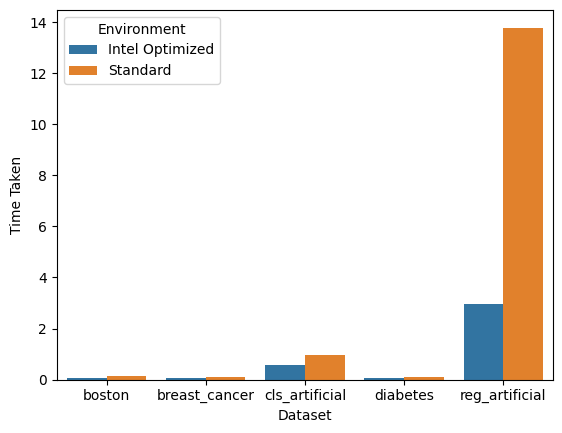

In [65]:
sns.barplot(data=data, x="Dataset", y="Time Taken", hue="Environment");

We can also plot the percentage difference

In [61]:
data_std = data[data['Environment']== 'Standard'].sort_values('Dataset').set_index('Dataset')
data_intel = data[data['Environment']== 'Intel Optimized'].sort_values('Dataset').set_index('Dataset')

In [60]:
data_intel.set_index('Dataset')

,Environment,Time Taken,file,Time Taken (log)
Dataset,,,,
boston,Intel Optimized,0.059618,intel_boston.csv,-2.819802
breast_cancer,Intel Optimized,0.052719,intel_breast_cancer.csv,-2.942773
cls_artificial,Intel Optimized,0.559170,intel_cls_artificial.csv,-0.581302
diabetes,Intel Optimized,0.056502,intel_diabetes.csv,-2.873486
reg_artificial,Intel Optimized,2.977656,intel_reg_artificial.csv,1.091136


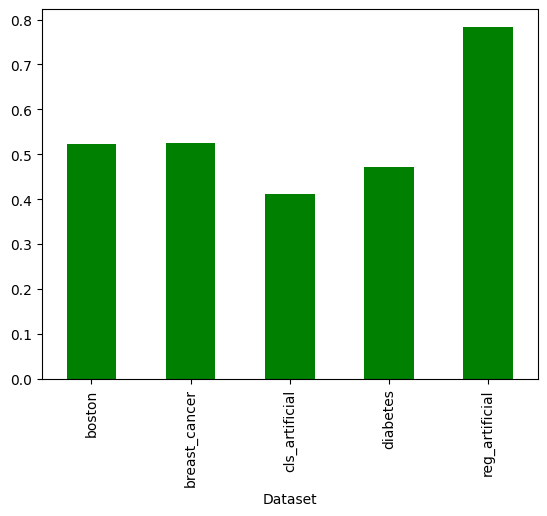

In [63]:
diff = data_std['Time Taken'] - data_intel['Time Taken']
diff_pct = diff/data_std['Time Taken']
diff_pct.clip(lower=0).plot.bar(color='green')
diff_pct.clip(upper=0).plot.bar(color='red');

# Breast Cancer Dataset

In [3]:
py39_breast_cancer = pd.read_csv('results/py39_breast_cancer.csv', index_col=0)
py39_breast_cancer.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.985965,0.982690,0.982690,0.985934,0.008883
SVC,0.982456,0.979942,0.979942,0.982437,0.007609
RandomForestClassifier,0.971930,0.971701,0.971701,0.971987,0.071006
KNeighborsClassifier,0.961404,0.955030,0.955030,0.961276,0.020913
NuSVC,0.954386,0.943215,0.943215,0.954014,0.007338


In [4]:
intel_breast_cancer = pd.read_csv('results/intel_breast_cancer.csv', index_col=0)
intel_breast_cancer.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.985965,0.982690,0.982690,0.985934,0.012356
SVC,0.982456,0.979942,0.979942,0.982437,0.018067
RandomForestClassifier,0.978947,0.977195,0.977195,0.978947,0.020147
KNeighborsClassifier,0.961404,0.955030,0.955030,0.961276,0.006043
NuSVC,0.954386,0.943215,0.943215,0.954014,0.012279


## Comparing Performance

I used *breast_cancer* dataset that was discussed in the class, for comparing model performance. The most straight forward way would be plot the time taken by each model in both the environments side-by-side.

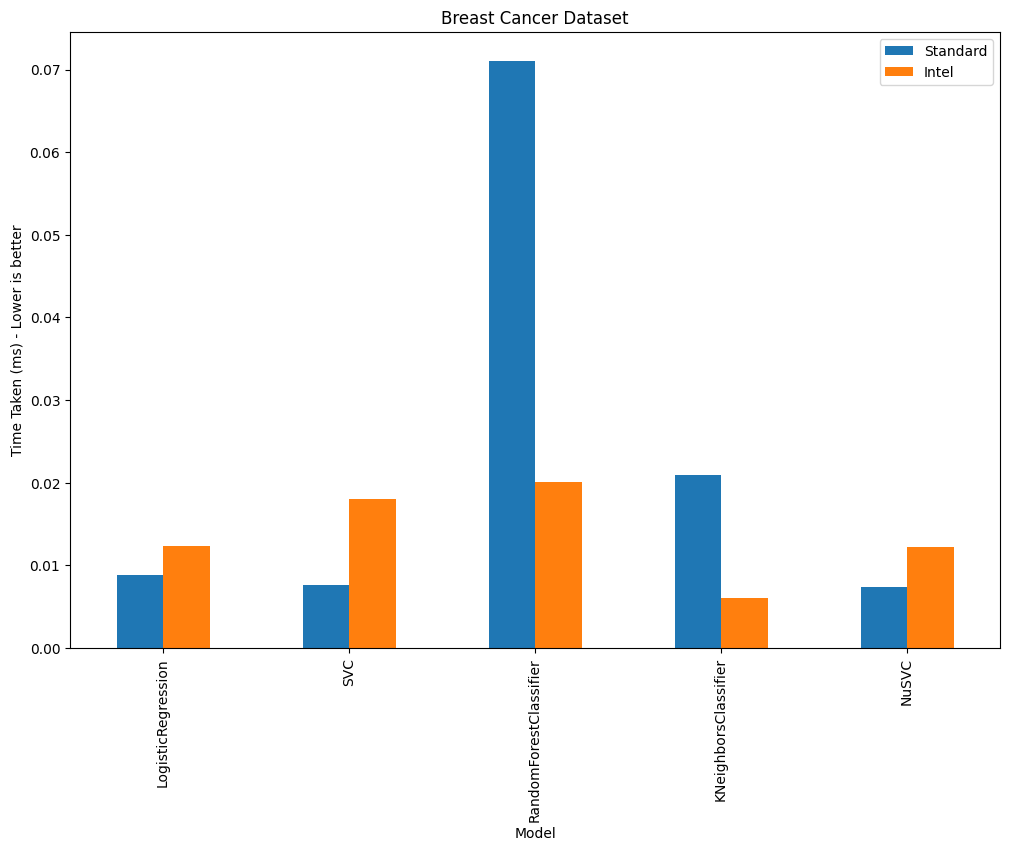

In [5]:
pd.DataFrame({'Standard':py39_breast_cancer['Time Taken'], 'Intel': intel_breast_cancer['Time Taken']}).plot.bar(title="Breast Cancer Dataset", ylabel='Time Taken (ms) - Lower is better', figsize=(12, 8));
plt.savefig('images/breast_cancer.svg', dpi=300, bbox_inches="tight")

As one can see from the graph, its not very obvious. Some times its works, and other times its doesn't. It would be more clear if we plot the time difference (i.e. Time Taken in `Standard` - Time Taken in `Intel`) for each model.

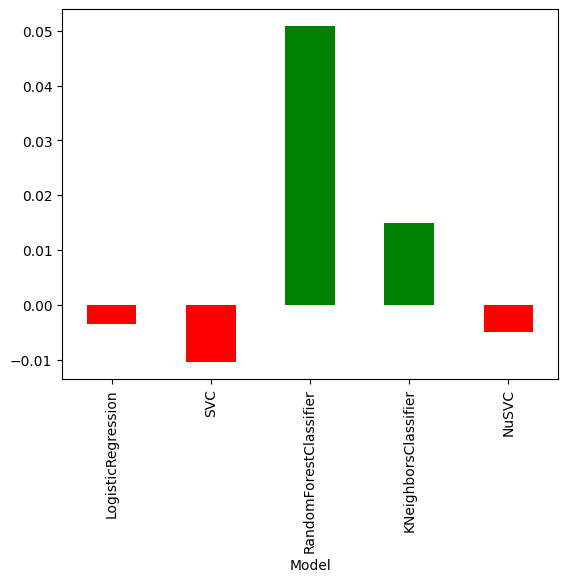

In [8]:
diff = py39_breast_cancer['Time Taken'] - intel_breast_cancer['Time Taken']
diff.clip(lower=0).plot.bar(color='green')
diff.clip(upper=0).plot.bar(color='red');

Again, it can be clearly seen from the above plot that most models perform better in `modin` environment. But this plot doesn't give us the complete picture. Say for example, the model takes 2 mins in `py37` environment and 2:12 mins in `modin` enviroment. Now, 12 secs would look huge on the above plot but in reality its only 10% better. The point is, we should normalise the above plot to get a fair quantitative idea about the performance boost. 

So lets see percentange boost in performance with respect to Time Taken in `py37` environment. 

<AxesSubplot: xlabel='Model'>

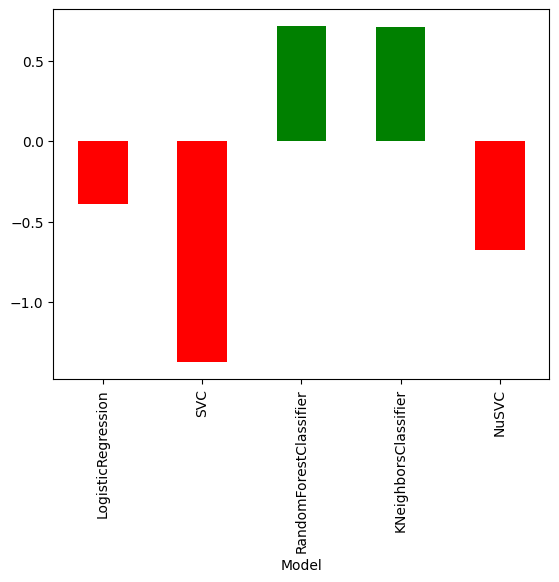

In [9]:
diff_pct = diff/py39_breast_cancer['Time Taken']
diff_pct.clip(lower=0).plot.bar(color='green')
diff_pct.clip(upper=0).plot.bar(color='red')

In most cases, the performance gain is quite significant (i.e. more than 20%) where as in few cases, the performance has degraded by 20%. But overall the graph is green the gains are significant compared to the loss in some cases.

We can take the total time taken to run all the models in both the environments instead of individual models. This will give us the average performance gain.
- Total Time Taken in `py37` environment : 0.7172 ms
- Total Time Taken in `modin` environment : 0.5014 ms

In [10]:
py39_breast_cancer["Time Taken"].sum(), intel_breast_cancer["Time Taken"].sum()

(0.11574816703796359, 0.0688920021057127)

In [11]:
(py39_breast_cancer["Time Taken"].sum() - intel_breast_cancer["Time Taken"].sum())/intel_breast_cancer["Time Taken"].sum()

0.6801393993507624

Its almost 43% better performance. This is huge. The result might look insignificant on *breast_cancer* dataset but these gain will add up when working with large datasets. 

As a data scientist, ability to iterate quickly is a blessing. So, anything that helps you test, devlop or train models quickly should be welcomed. I will highly encourage you to give "Intel AI Analytics Toolkit" a try. Intel also provides python environments for Pytorch and Tensorflow. And the best part is, you don't have to change your code. It just works!

## Regression
I conducted similar experiments on *boston housing* dataset and *diabetes* dataset. The results are quite surprising:

<AxesSubplot: xlabel='Model'>

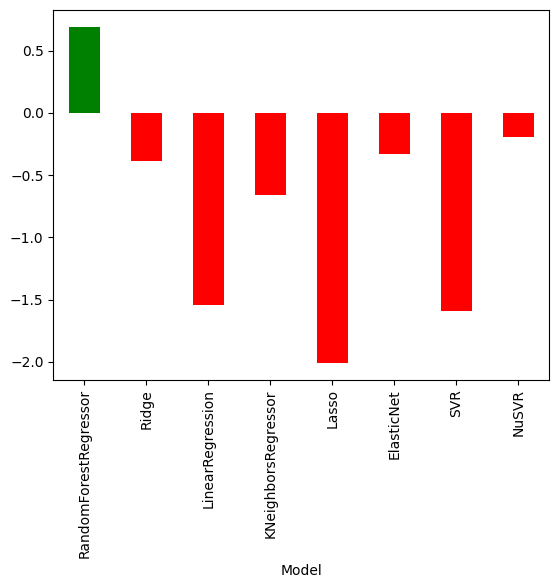

In [12]:
py39_boston = pd.read_csv('results/py39_boston.csv', index_col=0)
intel_boston = pd.read_csv('results/intel_boston.csv', index_col=0)
diff = py39_boston['Time Taken'] - intel_boston['Time Taken']
diff_pct = diff/py39_boston['Time Taken']
diff_pct.clip(lower=0).plot.bar(color='green')
diff_pct.clip(upper=0).plot.bar(color='red')

<AxesSubplot: xlabel='Model'>

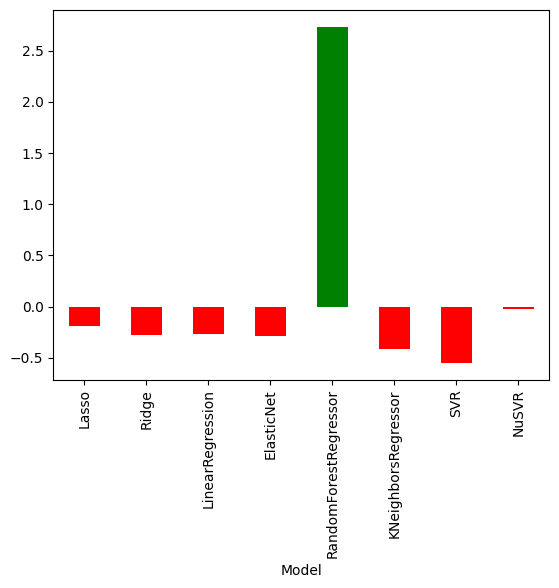

In [13]:
py39_diabetes = pd.read_csv('results/py39_diabetes.csv', index_col=0)
intel_diabetes = pd.read_csv('results/intel_diabetes.csv', index_col=0)
diff = py39_diabetes['Time Taken'] - intel_diabetes['Time Taken']
diff_pct = diff/intel_diabetes['Time Taken']
diff_pct.clip(lower=0).plot.bar(color='green')
diff_pct.clip(upper=0).plot.bar(color='red')